# **Employee Promotion Analysis & Prediction**

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Loading & Inspecting Dataset

In [2]:
df = pd.read_csv('class_employee_promotion.csv')
df.sample(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
17548,71897,Sales & Marketing,region_15,Bachelor's,m,other,1,27,3.0,2,1,47.0,0
50817,52137,Operations,region_22,Bachelor's,f,other,1,60,3.0,8,0,77.0,1
47806,16344,Analytics,region_27,Bachelor's,m,other,1,24,4.0,1,1,83.0,0
34026,16755,Procurement,region_23,Bachelor's,f,other,1,31,2.0,5,0,71.0,0
51069,36339,Finance,region_2,Bachelor's,m,sourcing,1,25,4.0,3,0,59.0,0


In [3]:
df.shape

(54808, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [5]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.83,22586.58,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.25,0.61,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.80,7.66,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.33,1.26,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.87,4.27,1.0,3.00,5.0,7.0,37.0
awards_won,54808.0,0.02,0.15,0.0,0.00,0.0,0.0,1.0
avg_training_score,52248.0,63.71,13.52,39.0,51.00,60.0,77.0,99.0
is_promoted,54808.0,0.09,0.28,0.0,0.00,0.0,0.0,1.0


In [6]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

## Data Preprocessing & Feature Engineering
- Missing Values
- Duplicated Records
- Outliers
- Data Manipulation
- Invalid values
- Scaling 
- Encoding 

In [7]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


<Axes: >

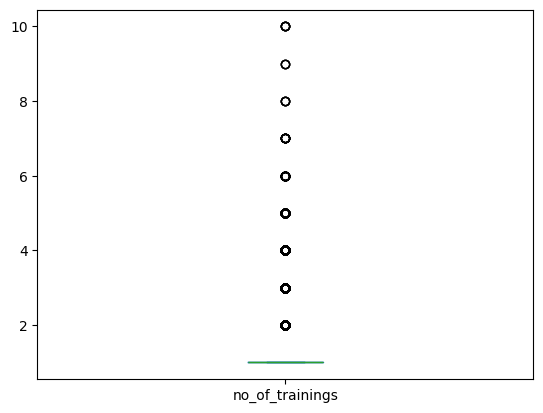

In [11]:
df['no_of_trainings'].plot(kind='box')

In [12]:
q1 = df['no_of_trainings'].quantile(0.25)
q3 = df['no_of_trainings'].quantile(0.75)

IQR = q3 - q1

lower_margin = q1 - 1.5 * IQR
upper_margin = q3 + 1.5 * IQR

df = df[ ( df['no_of_trainings'] >= lower_margin ) & ( df['no_of_trainings'] <= upper_margin ) ]


<Axes: >

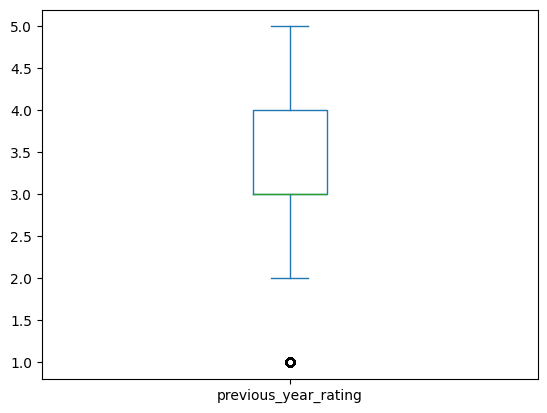

In [13]:
df['previous_year_rating'].plot(kind='box')

In [14]:
q1 = df['previous_year_rating'].quantile(0.25)
q3 = df['previous_year_rating'].quantile(0.75)

IQR = q3 - q1

lower_margin = q1 - 1.5 * IQR
upper_margin = q3 + 1.5 * IQR

df = df[ ( df['previous_year_rating'] >= lower_margin ) & ( df['previous_year_rating'] <= upper_margin ) ]


<Axes: >

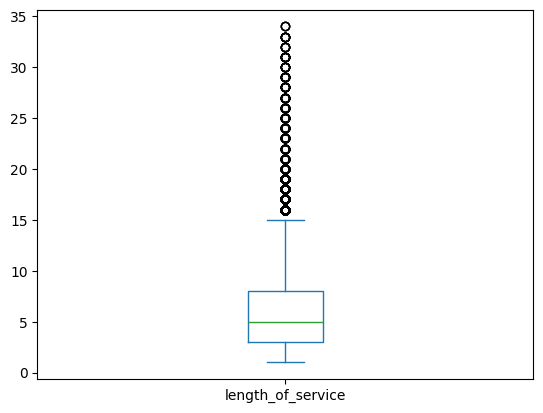

In [15]:
df['length_of_service'].plot(kind='box')

In [16]:
q1 = df['length_of_service'].quantile(0.25)
q3 = df['length_of_service'].quantile(0.75)

IQR = q3 - q1

lower_margin = q1 - 1.5 * IQR
upper_margin = q3 + 1.5 * IQR

df = df[ ( df['length_of_service'] >= lower_margin ) & ( df['length_of_service'] <= upper_margin ) ]


<Axes: >

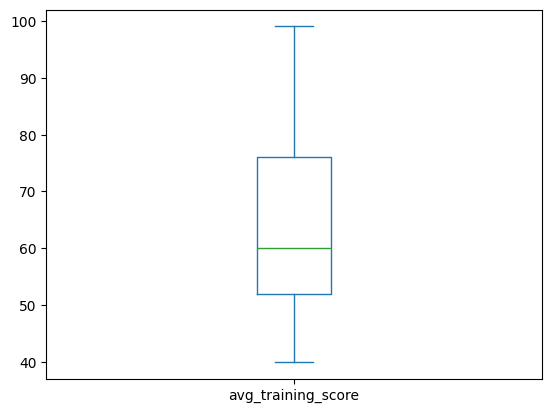

In [17]:
df['avg_training_score'].plot(kind='box')

In [18]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,59.0,0


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['department_encoded'] = le.fit_transform(df['department'])
df['department_encoded'].value_counts()

department_encoded
7    8594
4    6952
5    4468
8    4216
0    2909
2    1705
1    1346
3     622
6     574
Name: count, dtype: int64

In [20]:
df[['department' , 'department_encoded']].drop_duplicates().sort_values(by='department_encoded')

,department,department_encoded
8,Analytics,0
22,Finance,1
86,HR,2
156,Legal,3
1,Operations,4
20,Procurement,5
14,R&D,6
0,Sales & Marketing,7
4,Technology,8


In [21]:
df['region_encoded'] = le.fit_transform(df['region'])
df[['region' , 'region_encoded']].drop_duplicates().sort_values(by='region_encoded')

,region,region_encoded
9,region_1,0
68,region_10,1
22,region_11,2
91,region_12,3
46,region_13,4
20,region_14,5
19,region_15,6
47,region_16,7
45,region_17,8
895,region_18,9


In [22]:
df['education_encoded'] = le.fit_transform(df['education'])
df[['education' , 'education_encoded']].drop_duplicates().sort_values(by='education_encoded')

,education,education_encoded
1,Bachelor's,0
311,Below Secondary,1
0,Master's & above,2


In [23]:
df['gender'] = df['gender'].str.upper()

In [24]:
df['gender_encoded'] = le.fit_transform(df['gender'])
df[['gender' , 'gender_encoded']].drop_duplicates().sort_values(by='gender_encoded')

,gender,gender_encoded
0,F,0
1,M,1


In [25]:
df['recruitment_channel_encoded'] = le.fit_transform(df['recruitment_channel'])
df[['recruitment_channel' , 'recruitment_channel_encoded']].drop_duplicates().sort_values(by='recruitment_channel_encoded')

,recruitment_channel,recruitment_channel_encoded
1,other,0
80,referred,1
0,sourcing,2


In [26]:
# Rename the existing encoded column
df.rename(columns={'is_promoted': 'is_promoted_encoded'}, inplace=True)

# Create a readable version with Yes/No
df['is_promoted'] = df['is_promoted_encoded'].map({0: 'No', 1: 'Yes'})

df.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted_encoded,department_encoded,region_encoded,education_encoded,gender_encoded,recruitment_channel_encoded,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,F,sourcing,1,35,5.0,8,0,49.0,0,7,31,2,0,2,No
1,65141,Operations,region_22,Bachelor's,M,other,1,30,5.0,4,0,60.0,0,4,14,0,1,0,No
2,7513,Sales & Marketing,region_19,Bachelor's,M,sourcing,1,34,3.0,7,0,50.0,0,7,10,0,1,2,No
4,48945,Technology,region_26,Bachelor's,M,other,1,45,3.0,2,0,73.0,0,8,18,0,1,0,No
6,20379,Operations,region_20,Bachelor's,F,other,1,31,3.0,5,0,59.0,0,4,12,0,0,0,No


## Exploratory Data Analysis(EDA)
- Uni-variant Analysis.
- Bi-variant Analysis.
- Multi-variant Analysis.

In [27]:
df.sample(4)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted_encoded,department_encoded,region_encoded,education_encoded,gender_encoded,recruitment_channel_encoded,is_promoted
18975,6982,Procurement,region_2,Master's & above,M,other,1,38,2.0,11,0,70.0,0,5,11,2,1,0,No
53342,34917,Operations,region_22,Bachelor's,M,sourcing,1,39,4.0,3,0,56.0,0,4,14,0,1,2,No
50186,27229,Technology,region_22,Bachelor's,M,other,1,34,3.0,7,0,79.0,0,8,14,0,1,0,No
41678,66881,Sales & Marketing,region_3,Bachelor's,M,sourcing,1,28,3.0,2,0,51.0,0,7,22,0,1,2,No


In [28]:
df['employee_id'].count()

np.int64(31386)

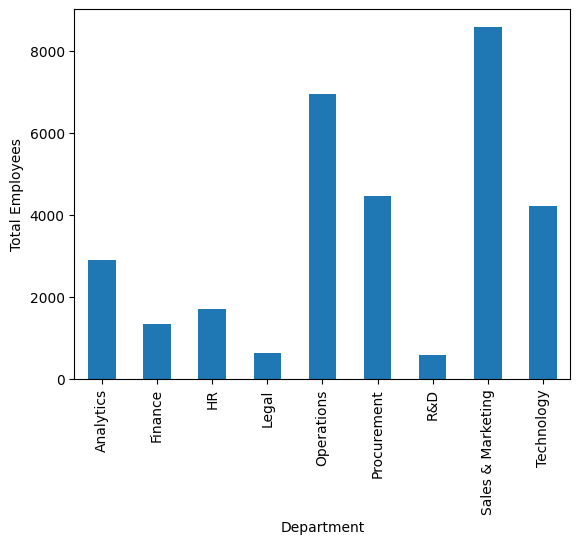

In [29]:
df.groupby('department').size().plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Total Employees')
plt.show()

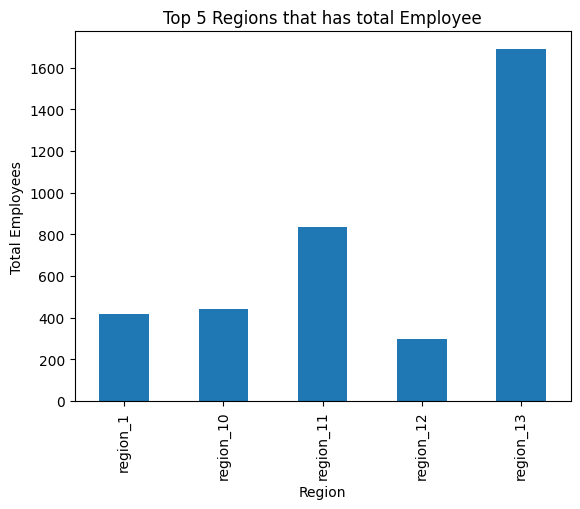

In [30]:
df.groupby('region').size().head().plot(kind='bar')
plt.title("Top 5 Regions that has total Employee")
plt.xlabel('Region')
plt.ylabel('Total Employees')
plt.show()

In [31]:
df.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted_encoded,department_encoded,region_encoded,education_encoded,gender_encoded,recruitment_channel_encoded,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,F,sourcing,1,35,5.0,8,0,49.0,0,7,31,2,0,2,No
1,65141,Operations,region_22,Bachelor's,M,other,1,30,5.0,4,0,60.0,0,4,14,0,1,0,No


In [32]:
df.groupby(['department' , 'education']).size()

department         education       
Analytics          Bachelor's          2237
                   Master's & above     672
Finance            Bachelor's          1014
                   Below Secondary       36
                   Master's & above     296
HR                 Bachelor's          1077
                   Below Secondary       55
                   Master's & above     573
Legal              Bachelor's           483
                   Below Secondary       31
                   Master's & above     108
Operations         Bachelor's          4811
                   Below Secondary       62
                   Master's & above    2079
Procurement        Bachelor's          2681
                   Below Secondary       42
                   Master's & above    1745
R&D                Bachelor's           305
                   Master's & above     269
Sales & Marketing  Bachelor's          6117
                   Master's & above    2477
Technology         Bachelor's          2

<Axes: xlabel='recruitment_channel'>

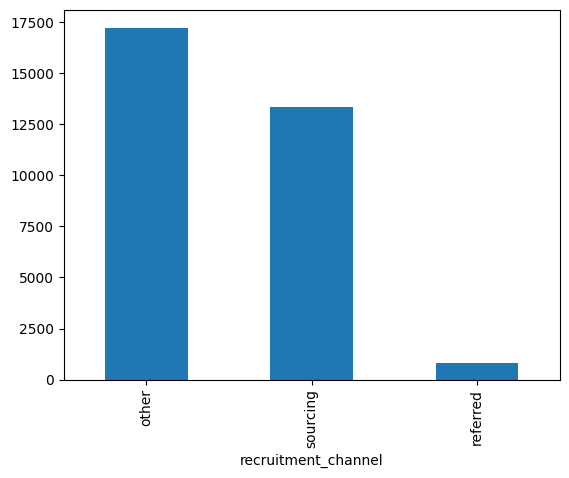

In [33]:
df['recruitment_channel'].value_counts().plot(kind='bar')

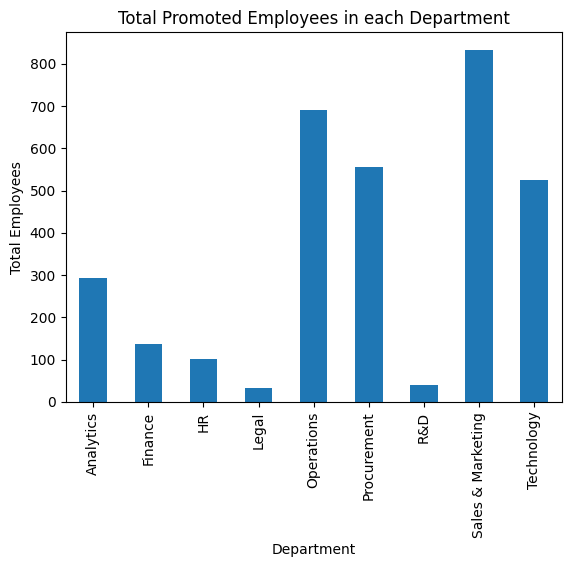

In [34]:
df.groupby('department')['is_promoted_encoded'].sum().plot(kind='bar')
plt.title("Total Promoted Employees in each Department")
plt.xlabel("Department")
plt.ylabel('Total Employees')
plt.show()

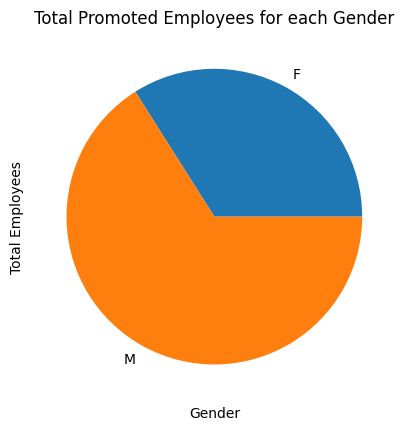

In [35]:
df.groupby('gender')['is_promoted_encoded'].sum().plot(kind='pie')
plt.title("Total Promoted Employees for each Gender")
plt.xlabel("Gender")
plt.ylabel('Total Employees')
plt.show()

In [36]:
df.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted_encoded,department_encoded,region_encoded,education_encoded,gender_encoded,recruitment_channel_encoded,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,F,sourcing,1,35,5.0,8,0,49.0,0,7,31,2,0,2,No
1,65141,Operations,region_22,Bachelor's,M,other,1,30,5.0,4,0,60.0,0,4,14,0,1,0,No


## Saving the Dataset

In [37]:
df.to_csv('Employee_Promotion_Cleaned.csv')

# Machine Learning Model

In [38]:
df.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted_encoded,department_encoded,region_encoded,education_encoded,gender_encoded,recruitment_channel_encoded,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,F,sourcing,1,35,5.0,8,0,49.0,0,7,31,2,0,2,No
1,65141,Operations,region_22,Bachelor's,M,other,1,30,5.0,4,0,60.0,0,4,14,0,1,0,No


In [39]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score',
       'is_promoted_encoded', 'department_encoded', 'region_encoded',
       'education_encoded', 'gender_encoded', 'recruitment_channel_encoded',
       'is_promoted'],
      dtype='object')

In [40]:
X = df[['department_encoded' , 'region_encoded' , 'education_encoded' , 'gender_encoded' , 
        'recruitment_channel_encoded' , 'no_of_trainings' , 'age' , 'previous_year_rating'
          , 'length_of_service' ]]
y = df['is_promoted_encoded']

In [41]:
X

,department_encoded,region_encoded,education_encoded,gender_encoded,recruitment_channel_encoded,no_of_trainings,age,previous_year_rating,length_of_service
0,7,31,2,0,2,1,35,5.0,8
1,4,14,0,1,0,1,30,5.0,4
2,7,10,0,1,2,1,34,3.0,7
4,8,18,0,1,0,1,45,3.0,2
6,4,12,0,0,0,1,31,3.0,5
...,...,...,...,...,...,...,...,...,...
54796,7,17,2,1,0,1,34,3.0,7
54797,7,2,0,1,2,1,28,5.0,3
54799,5,11,2,0,0,1,50,5.0,6
54804,4,19,2,0,0,1,37,2.0,6


In [42]:
y

0        0
1        0
2        0
4        0
6        0
        ..
54796    1
54797    0
54799    0
54804    0
54805    0
Name: is_promoted_encoded, Length: 31386, dtype: int64

## Scaling 

In [43]:
from sklearn.preprocessing import MinMaxScaler
mmx = MinMaxScaler() # For Feature X

X_scaled = mmx.fit_transform(X)


In [44]:
X_scaled

array([[0.875     , 0.93939394, 1.        , ..., 0.375     , 1.        ,
        0.5       ],
       [0.5       , 0.42424242, 0.        , ..., 0.25      , 1.        ,
        0.21428571],
       [0.875     , 0.3030303 , 0.        , ..., 0.35      , 0.33333333,
        0.42857143],
       ...,
       [0.625     , 0.33333333, 1.        , ..., 0.75      , 1.        ,
        0.35714286],
       [0.5       , 0.57575758, 1.        , ..., 0.425     , 0.        ,
        0.35714286],
       [0.        , 0.        , 0.        , ..., 0.175     , 1.        ,
        0.14285714]], shape=(31386, 9))

In [45]:
y.values.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], shape=(31386, 1))

## Splitting Data

In [46]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , test_size= 0.3 ,random_state= 0 )

print(f"X train shape is {X_train.shape}")
print(f"y train shape is {y_train.shape}")
print(f"X test shape is {X_test.shape}")
print(f"X train shape is {y_test.shape}")


X train shape is (21970, 9)
y train shape is (21970,)
X test shape is (9416, 9)
X train shape is (9416,)


# Building Model

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [57]:
lr = LogisticRegression(class_weight='balanced', random_state=42)
svc = SVC(class_weight='balanced', probability=True, random_state=42)
dtc = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
knn = KNeighborsClassifier()

### Parameters Lists

In [58]:
# Logistic Regression
param1 = {}
param1['regressor__C'] = [0.01, 0.1, 1, 10]
param1['regressor__solver'] = ['liblinear']
param1['regressor__max_iter'] = [200]
param1['regressor'] = [lr]

# Support Vector Classifier
param2 = {}
param2['regressor__C'] = [0.1, 1, 10]
param2['regressor__kernel'] = ['linear', 'rbf']
param2['regressor__gamma'] = ['scale']
param2['regressor'] = [svc]

# Decision Tree Classifier
param3 = {}
param3['regressor__criterion'] = ['gini']
param3['regressor__max_depth'] = [5, 10, 20]
param3['regressor__min_samples_split'] = [2, 10]
param3['regressor'] = [dtc]

# Random Forest Classifier
param4 = {}
param4['regressor__n_estimators'] = [100, 200]
param4['regressor__max_depth'] = [5, 10, 15]
param4['regressor__criterion'] = ['gini']
param4['regressor'] = [rfc]

# K-Nearest Neighbors
param5 = {}
param5['regressor__n_neighbors'] = [3, 5, 7]
param5['regressor__weights'] = ['distance']
param5['regressor__metric'] = ['minkowski']
param5['regressor'] = [knn]

In [59]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('regressor' , lr)])

params = [param1 , param2 , param3 , param4 , param5]

In [60]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(pipeline, params, cv=5, scoring='f1')

In [61]:
gs.fit(X_train , y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'regressor': [LogisticRegre...ndom_state=42)], 'regressor__C': [0.01, 0.1, ...], 'regressor__max_iter': [200], 'regressor__solver': ['liblinear']}, {'regressor': [SVC(class_wei...ndom_state=42)], 'regressor__C': [0.1, 1, ...], 'regressor__gamma': ['scale'], 'regressor__kernel': ['linear', 'rbf']}, ...]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` def

In [ ]:
print(f"Best Parameters : {gs.best_params_}")
print(f"Best Score : {gs.best_score_}")


Best Parameters : {'regressor': RandomForestClassifier(class_weight='balanced', random_state=42), 'regressor__criterion': 'gini', 'regressor__max_depth': 10, 'regressor__n_estimators': 100}
Best Score : 0.2574264573583157


##  Model Saving

In [63]:
import joblib

joblib.dump(gs.best_estimator_ , 'best_model.pkl')
joblib.dump(mmx , 'scaler.pkl')

['scaler.pkl']

## Model Testing

In [64]:
my_model = joblib.load('best_model.pkl')

y_pred = my_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(9416,))

## Model Evaluation

In [65]:

from sklearn.metrics import classification_report, confusion_matrix

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[6890 1600]
 [ 568  358]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      8490
           1       0.18      0.39      0.25       926

    accuracy                           0.77      9416
   macro avg       0.55      0.60      0.56      9416
weighted avg       0.85      0.77      0.80      9416

